In [1]:
import numpy as np
import pandas as pd 

from sklearn.datasets import load_wine
from sklearn.model_selection import cross_val_predict, train_test_split
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from math import sqrt

import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier 
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import CategoricalNB
from sklearn.preprocessing import MinMaxScaler
from sklearn import naive_bayes

from sklearn.linear_model import LinearRegression


In [2]:
data= load_wine()

In [3]:
data1 = pd.DataFrame(data= np.c_[data['data'], data['target']],
                     columns= data['feature_names'] + ['target'])

In [4]:
X = data1.drop(columns='target')
y = data1.target

In [5]:
#standard scaling 
scale = StandardScaler()
X = scale.fit_transform(X)

In [6]:
scaler = MinMaxScaler() 
scaler.fit(X)
X = scaler.transform(X) 

Text(0.5, 1.0, 'Change of Accuracy at different K')

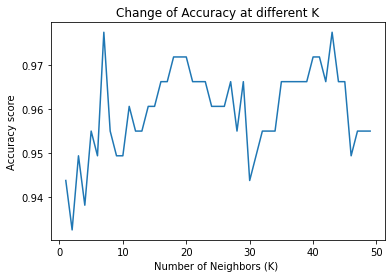

In [7]:
error = []
for k in range(1,50):
    knn = KNeighborsClassifier(n_neighbors=k)
    y_pred = cross_val_predict(knn, X, y, cv=5)
    #error.append(sqrt(mean_squared_error(y,y_pred))) 
    error.append(accuracy_score(y,y_pred))
plt.plot(range(1,50),error)
plt.xlabel('Number of Neighbors (K) ')  
plt.ylabel('Accuracy score')  
plt.title("Change of Accuracy at different K") 

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state= 21)

In [9]:
model2= LinearRegression(fit_intercept=True)
model2.fit(X_train, y_train)
ypred2= model2.predict(X_test)

In [10]:
corr =data1.corr()

In [11]:
abs(corr['target']) 

alcohol                         0.328222
malic_acid                      0.437776
ash                             0.049643
alcalinity_of_ash               0.517859
magnesium                       0.209179
total_phenols                   0.719163
flavanoids                      0.847498
nonflavanoid_phenols            0.489109
proanthocyanins                 0.499130
color_intensity                 0.265668
hue                             0.617369
od280/od315_of_diluted_wines    0.788230
proline                         0.633717
target                          1.000000
Name: target, dtype: float64

In [12]:
#decision Tree
model1 = DecisionTreeClassifier()
pred=cross_val_predict(model1,X, y, cv = 10)
accuracy_score(y,pred)

0.8651685393258427

In [13]:
#Random forrest
model2 = RandomForestClassifier()
model2.fit(X_train, y_train)
ypred = model2.predict(X_test)
accuracy_score(y_test,ypred)

1.0

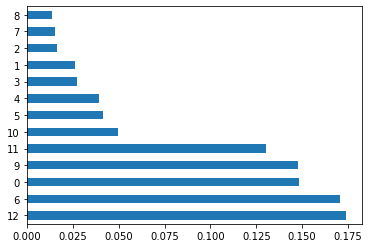

In [14]:
feat_importances = pd.Series(model2.feature_importances_)
feat_importances.nlargest(13).plot(kind='barh')

In [15]:
data1

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0,2.0
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0,2.0
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0,2.0
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0,2.0


In [16]:
#Gradient Boosting
model3 = GradientBoostingClassifier(n_estimators= 1000)
pred=cross_val_predict(model3,X, y, cv = 10)
accuracy_score(y,pred)

0.9382022471910112

In [17]:
#neural network  relu
model4 = MLPClassifier(activation = "relu" , max_iter = 800 , solver = "adam")
pred=cross_val_predict(model4,X, y, cv = 10)
accuracy_score(y,pred)

0.9775280898876404

In [18]:
#neural network  relu
model5 = MLPClassifier(activation = "relu" , max_iter = 800, solver = "lbfgs")
pred=cross_val_predict(model5,X, y, cv = 10)
accuracy_score(y,pred)

0.9719101123595506

In [19]:
#Naive Bayes
from sklearn.naive_bayes import GaussianNB

X, y = load_wine(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=12)
gnb = GaussianNB()
y_pred = gnb.fit(X_train, y_train).predict(X_test)
accuracy_score(y_test,y_pred)

0.9444444444444444

In [20]:
model = naive_bayes.BernoulliNB()
model.fit(X_train, y_train)
y_pred = model.fit(X_train, y_train).predict(X_test)
accuracy_score(y_test,y_pred)

0.3333333333333333